## <b>Importing Libraries</b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from warnings import filterwarnings
filterwarnings('ignore')

### <b>Reading Dataset:</b>

In [5]:
match_data = pd.read_csv("IPL Matches 2008-2020.csv")
ball_data = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")

In [6]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [7]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [8]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
match_data.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [10]:
match_data.dtypes.value_counts()

object     14
int64       2
float64     1
dtype: int64

#### <b>Checking for Null values:</b>

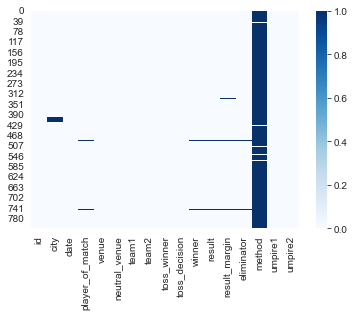

In [11]:
sns.heatmap(match_data.isnull(),cmap='Blues')
plt.show()

In [12]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [13]:
print("The percentage of null values in the columns consisting of null values:\n")
for i in match_data.columns:
    null_rate = match_data[i].isna().sum() / len(match_data) * 100 
    if null_rate > 0 :
        print("null rate of {} column: {}%".format(i,round(null_rate,3)))

The percentage of null values in the columns consisting of null values:

null rate of city column: 1.593%
null rate of player_of_match column: 0.49%
null rate of winner column: 0.49%
null rate of result column: 0.49%
null rate of result_margin column: 2.083%
null rate of eliminator column: 0.49%
null rate of method column: 97.672%


#### <b>Number of unique values in each column:</b>

In [14]:
match_data.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               3
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
dtype: int64

In [15]:
match_data.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [16]:
match_data.shape

(816, 17)

## <b>Data preprocessing:</b>

### <b>City:</b>

In [17]:
match_data[match_data['city'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
407,729297,NaN,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,1,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,N,NaN,HDPK Dharmasena,RK Illingworth
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni
409,729301,NaN,2014-04-25,AJ Finch,Dubai International Cricket Stadium,1,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,4.0,N,NaN,M Erasmus,S Ravi
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni


- From the given table consisting of **null value present in "city" column** we are able to infer that
    - Rows consisting of **Sharjah or Dubai stadium** only have their "city" values missing
    
Hence we would be filling the null values accordingly

In [18]:
for idx in match_data[match_data['city'].isna()].index:
        match_data.loc[idx, 'city'] = 'Sharjah' if match_data.loc[idx, 'venue'] == 'Sharjah Cricket Stadium' else 'Dubai'

Let us take an look at the unique values present in the city column

In [19]:
match_data['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur', 'Bengaluru'],
      dtype=object)

- We get to see **Bangalore** as well as **Bengaluru** , hence we will replace it appropriately

In [20]:
match_data['city'].replace('Bengaluru', 'Bangalore', inplace=True)

### <b>Player of the match,Winner,Result,Result Margin:</b>

In [21]:
match_data[match_data['player_of_match'].isnull()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bangalore,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


- From the above cell we are able to see that we dont have any values not only for the <b>Player of the match</b> field but also for **winner, result , result_margin ,eliminator** fields
- All these values remain missing cause the matches were washed away due to rain.
- Hence we will fill these columns values with "no result"

In [22]:
def no_result(df): #passing the dataframe as the parameter
    for idx in match_data.loc[match_data['result'].isna()].index:
        match_data.loc[idx,'winner']="No result"
        match_data.loc[idx,'result']="No result"
        match_data.loc[idx,'result_margin']="No result"
no_result(match_data)

### <b>Method:</b>

In [23]:
match_data.loc[-match_data.method.isna()].head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene


In [24]:
match_data.loc[-match_data.method.isna()].value_counts().sum()

19

- The **method** column consists of only 19 values with **"D/L"** being the only value present.
- Hence no need to temper with this column

### <b>Neutral Venue:</b>

- Would like to thank https://www.kaggle.com/harshdhamecha for giving this insight.
- The link to his notebook:
  https://www.kaggle.com/code/harshdhamecha/feature-engineering/notebook
  

In [25]:
playoff_ids = [336038, 336039, 336040, 392237, 392238, 392239, 419162, 419163, 419165, 501268, 501269, 501270, 501271, 548378, 548379, 548380, 548381, 598070, 598071, 598072, 
               598073, 734043, 734045, 734047, 734049, 829817, 829819, 829821, 829823, 981013, 981015, 981017, 981019, 1082647, 1082648, 1082649, 1082650, 1136617, 
               1136618, 1136619, 1136620, 1181764, 1181766, 1181767, 1181768, 1237177, 1237178, 1237180, 1237181]
# ids of all qualifier matches
qualifier_ids = [336038, 336039, 392237, 392238, 419162, 419163, 501268, 501270, 548378, 548380, 598070, 598072, 734043, 734047, 
                 829817, 829821, 981013, 981017, 1082647, 1082649, 1136617, 1136619, 1181764, 1181767, 1237177, 1237180]

# ids of all eliminator matches
eliminator_ids = [501269, 548379, 598071, 734045, 829819, 981015, 1082648, 1136618, 1181766, 1237178]

# ids of all final matches
final_ids = [336040, 392239, 419165, 501271, 548381, 598073, 734049, 829823, 981019, 1082650, 1136620, 1181768, 1237181]

# ids of all playoff matches when matches played in team2's home ground
team2_home_ids = [419163, 548380, 548381, 734043, 829817, 981013, 1181764]

# ids of all playoff matches when matches played at neutral venues 
change_neutral_venue_ids = [336038, 336039, 336040, 419162, 419165, 501268, 501270, 548378, 548379, 598070, 598071, 598072, 598073, 734045, 
                    734047, 734049, 829819, 829821, 829823, 981015, 981017, 1082648, 1082649, 1082650, 1136617, 1136620, 1181766, 1181767, 1181768]

def change_neutral_venue(df, change_neutral_venue_ids):
    for idx in match_data.index:
        if idx in change_neutral_venue_ids:
            match_data.loc[idx, 'neutral_venue'] = 1 
        if match_data.loc[idx, 'date'][0:4] == '2020':
            match_data.loc[idx, 'neutral_venue'] = 1
change_neutral_venue(match_data, change_neutral_venue_ids)

### <b>Teams:</b>

In [26]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

match_data.replace(x,y,inplace = True)
ball_data.replace(x,y,inplace=True)
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DC,RR,RR,bat,DC,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,SRH,SRH,bat,KKR,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [27]:
match_data.shape

(816, 17)

## <b>Exploratory Data Analysis:</b>

In [28]:
def cols(df):
    cv= df.dtypes=='object'
    lcv=list(cv[cv].index)
    nv = df.dtypes!='object'
    ncv = list(nv[nv].index)
    print("Catesnsrical Features:\n",lcv)
    print("Numerical Features:\n",ncv)

In [29]:
cols(match_data)

Catesnsrical Features:
 ['city', 'date', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2']
Numerical Features:
 ['id', 'neutral_venue']


## <b>Univariate Analysis:</b>

### <b>City:</b>

In [30]:
cities = match_data['city'].value_counts().head(10)
cities

Mumbai        101
Bangalore      80
Kolkata        77
Delhi          74
Hyderabad      64
Chennai        57
Chandigarh     56
Jaipur         47
Pune           38
Dubai          33
Name: city, dtype: int64

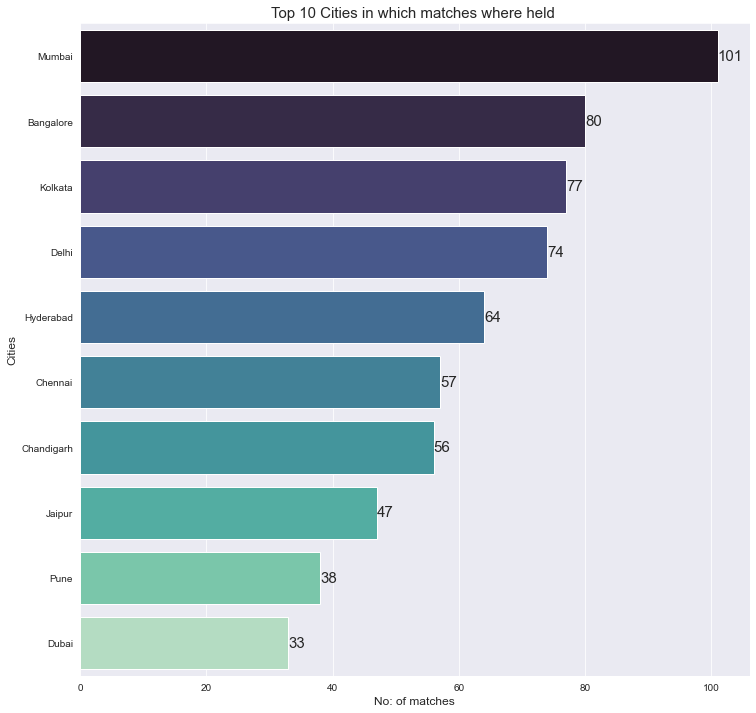

In [31]:
plt.figure(figsize=(12,12))
c1 = sns.countplot(y= 'city',order=match_data['city'].value_counts().iloc[:10].index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Cities',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Cities in which matches where held ',fontsize=15)
plt.show()

- 101 Matches were held in Mumbai and is the highest match held city closely followed by Bangalore and Kolkata

### <b>Matches Played in Each Season:</b>

In [32]:
match_data['date']=match_data['date'].str[:4].astype(int)
season = match_data['date'].value_counts().reset_index()
season.columns=['Year','Total Matches']
season

,Year,Total Matches
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2014,60
5,2016,60
6,2018,60
7,2019,60
8,2020,60
9,2015,59


- More than 70 matches were played during 2012 and 2013 due to the presence of two additional teams namely (KTK and PW)

### <b>Player of match:</b>

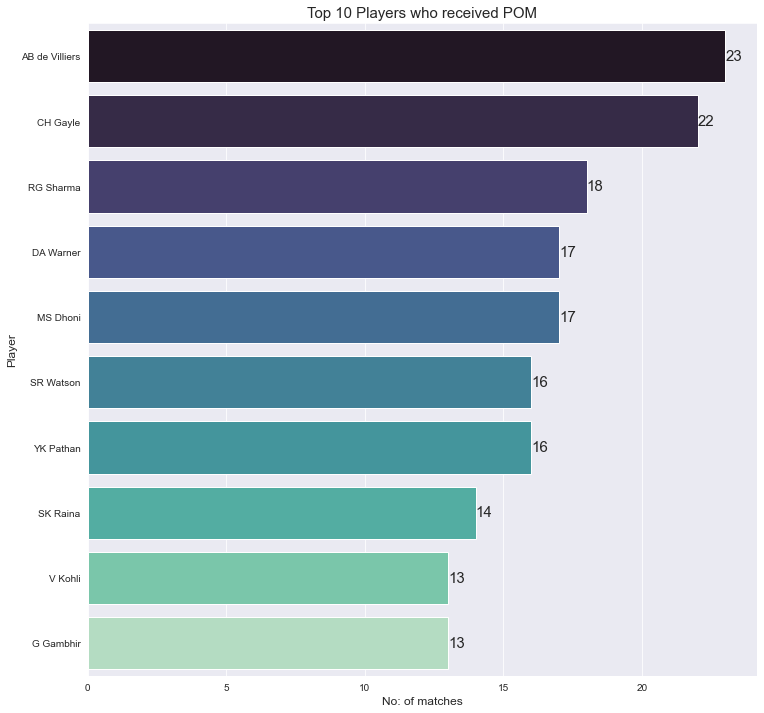

In [33]:
pom = match_data['player_of_match'].value_counts().iloc[:10]
plt.figure(figsize=(12,12))
c1 = sns.countplot(y= 'player_of_match',order=pom.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Player',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Players who received POM',fontsize=15)
plt.show()

- AB de Villiers has received 23 player of the match awards over his entire IPL playing career.
- Chris Gayle and Rohit Sharma closely follow him with 22 and 18 POM's.

### <b>Venue:</b>

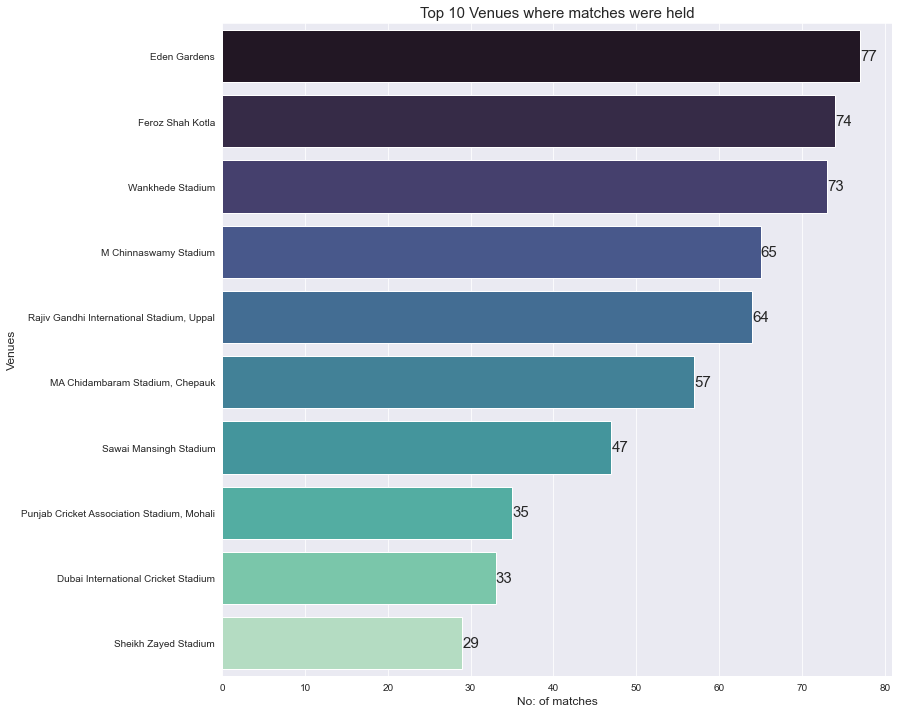

In [34]:
venues = match_data['venue'].value_counts().head(10)
plt.figure(figsize=(12,12))
c1 = sns.countplot(y='venue',order=venues.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Venues where matches were held',fontsize=15)
plt.show()

- Eden gardens situated in Kolkata has hosted the highest number of matches.
- Despite the fact that more matches were held in Mumbai , Feroz Shah Kotla Stadium in Delhi has hosted 74 matches and is the second highest host stadium.
- These 3 stadiums has hosted the highest number of matches as the Finals , Eliminator matches were held here.

### <b>Teams:</b>

In [35]:
match_app=pd.concat([match_data['team1'],match_data['team2']])
match_app=match_app.value_counts().reset_index()
match_app.columns=['Team','Total Matches']
match_app

,Team,Total Matches
0,MI,203
1,SRH,199
2,RCB,195
3,DC,194
4,KKR,192
5,KXIP,190
6,CSK,178
7,RR,161
8,PW,46
9,GL,30


- Teams RPS and GL were present for only two seasons.
- KTK AND PW were present for two seasons after which they were ousted from the league.

### <b>Toss Winner:</b>

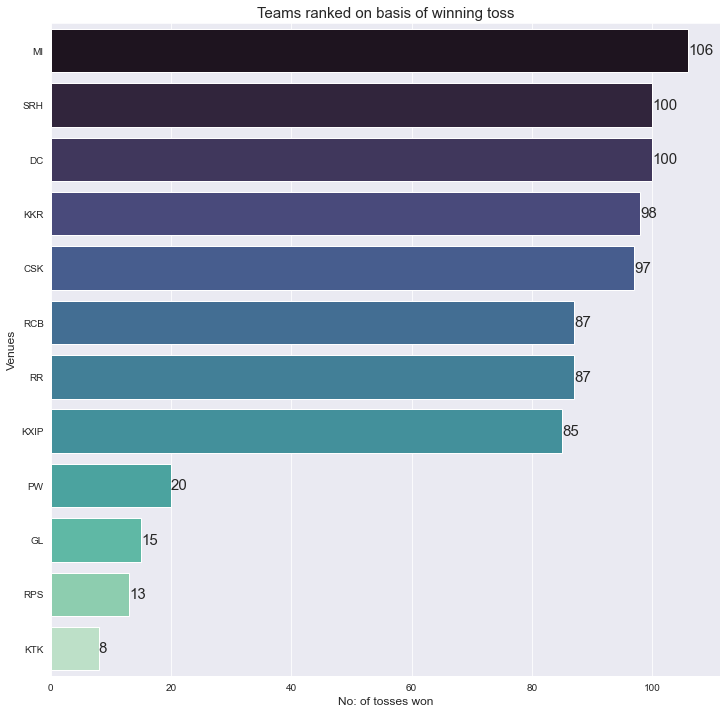

In [36]:
toss_wins = match_data['toss_winner'].value_counts()
plt.figure(figsize=(12,12))
c1 = sns.countplot(y='toss_winner',order=toss_wins.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of tosses won',fontsize=12)
plt.title('Teams ranked on basis of winning toss',fontsize=15)
plt.show()

- Mumbai Indians have won the highest number of tosses closely followed by Sunrises Hyderbad and Delhi Capitals

### <b>Toss Decision:</b>

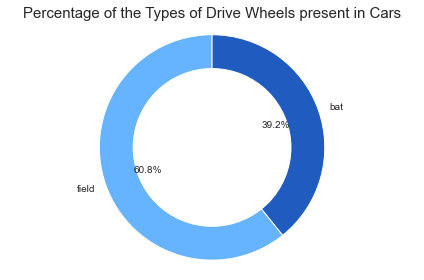

In [37]:
labels = match_data['toss_decision'].unique()
sizes =  match_data['toss_decision'].value_counts()

colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Percentage of the Types of Drive Wheels present in Cars",fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

- Most of the teams which tends to win the toss opted to <b>Field</b> first.(60.8 percent)

### <b>Winner:</b>

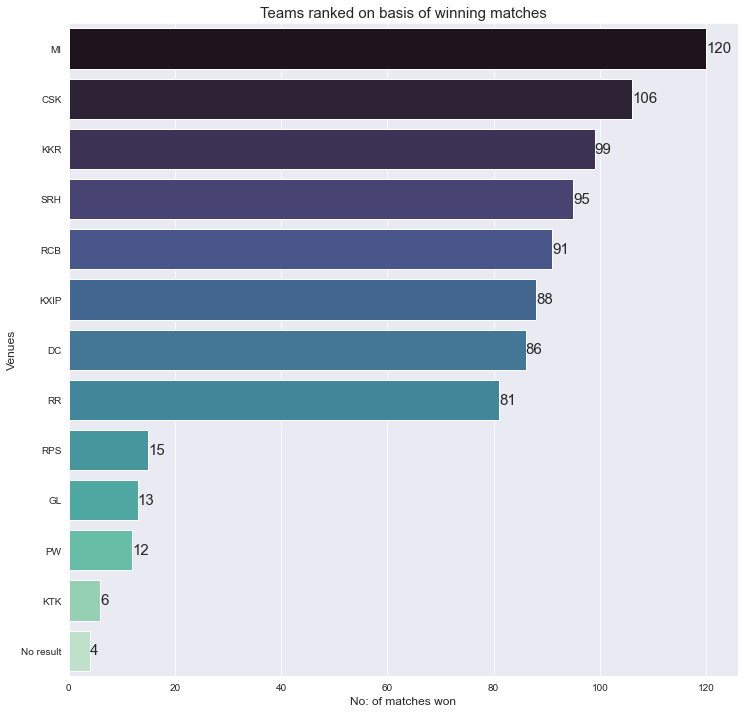

In [38]:
wins = match_data['winner'].value_counts()
plt.figure(figsize=(12,12))
c1 = sns.countplot(y='winner',order=wins.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of matches won',fontsize=12)
plt.title('Teams ranked on basis of winning matches',fontsize=15)
plt.show()

From the plot it is quite evident:
- <b> Mumbai Indians and Chennai Super Kings have won the highest number of matches</b>
- <b> The two teams have respectively have won the highest number of IPL trophies</b>

### <b>Result:</b>

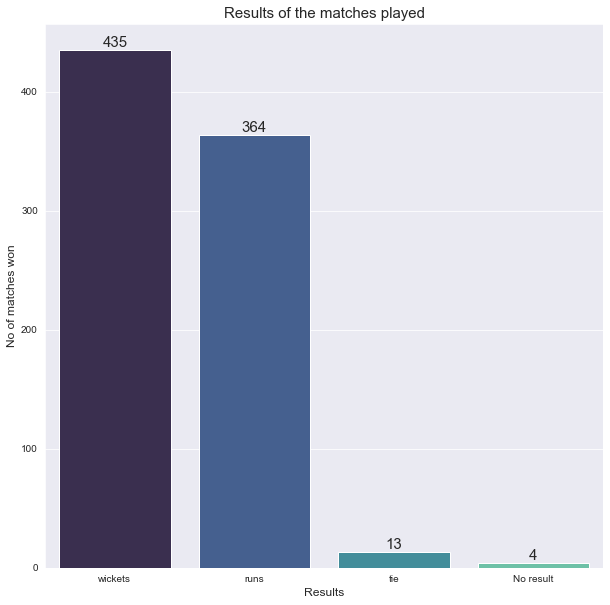

In [39]:
res = match_data['result'].value_counts()
plt.figure(figsize=(10,10))
c1 = sns.countplot(x='result',order=res.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('No of matches won',fontsize=12)
plt.xlabel('Results',fontsize=12)
plt.title('Results of the matches played',fontsize=15)
plt.show()

- **Most of the matches played in IPL are won by teams which tends to chase rather than bat first** .

### <b>Result Margin:</b>

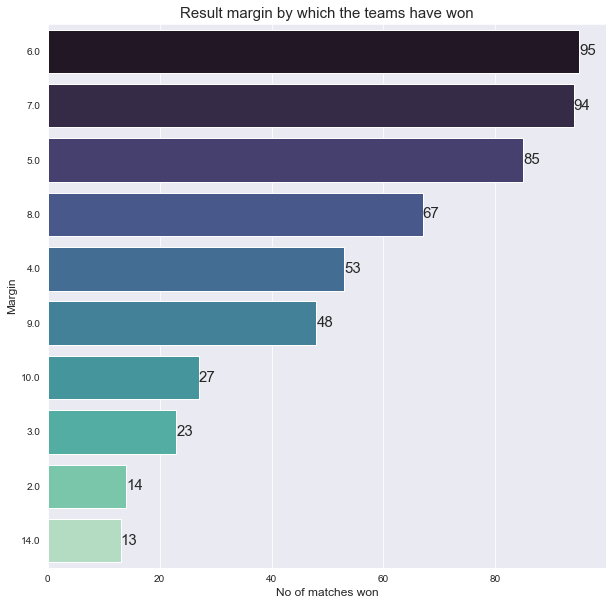

In [40]:
res_mar = match_data['result_margin'].value_counts().head(10)
plt.figure(figsize=(10,10))
c1 = sns.countplot(y='result_margin',order=res_mar.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Margin',fontsize=12)
plt.xlabel('No of matches won',fontsize=12)
plt.title('Result margin by which the teams have won',fontsize=15)
plt.show()

From the given plot we can infer that:
- **Most of the matches played in IPL are won by teams with very low margins.**
- Every match boils down until the last minute!

### <b>Umpires:</b>

In [41]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']])
ump=ump.value_counts().reset_index()
ump.columns=['Umpire','Total Matches']
ump.head(10)

,Umpire,Total Matches
0,S Ravi,121
1,HDPK Dharmasena,94
2,AK Chaudhary,87
3,C Shamshuddin,82
4,M Erasmus,65
5,CK Nandan,57
6,Nitin Menon,57
7,SJA Taufel,55
8,Asad Rauf,51
9,VA Kulkarni,50


## <b>Multivariate Analysis:</b>

### **1.Average Runs scored:**

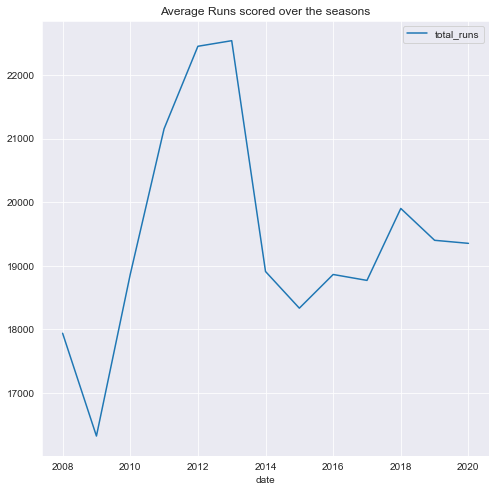

In [42]:
batsmen = match_data[['id','date']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['date'])['total_runs'].sum().reset_index()

avgruns_yr=match_data.groupby(['date']).count().id.reset_index()
avgruns_yr.rename(columns={'id':'matches'},inplace=1)
avgruns_yr['total_runs']=season['total_runs']
avgruns_yr['average_runs_per_match']=avgruns_yr['total_runs']/avgruns_yr['matches']

avgruns_yr.plot(title="Average Runs scored over the seasons",x='date',y='total_runs',figsize=(8,8))
plt.show()

- **The number of runs scored in 2012 and 2013 is higher compared to other years as the number of matches played is higher!**

### <b>Distribution of Runs scored over the years:</b>

In [43]:
runs_dist=batsmen.groupby("date")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
fours=batsmen.groupby("date")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
runs_dist=runs_dist.merge(fours,left_on='date',right_on='date',how='left')
runs_dist=runs_dist.rename(columns={'batsman_runs_x':"6's",'batsman_runs_y':"4's"})
runs_dist

,date,6's,4's
0,2008,623,1703
1,2009,506,1317
2,2010,585,1708
3,2011,639,1916
4,2012,733,1911
5,2013,675,2052
6,2014,714,1562
7,2015,692,1607
8,2016,639,1633
9,2017,705,1611


In [44]:
runs_dist["6's"] = runs_dist["6's"]*6
runs_dist["4's"] = runs_dist["4's"]*4
runs_dist['Remaining_runs'] = season['total_runs']-(runs_dist["6's"]+runs_dist["4's"])
runs_dist

,date,6's,4's,Remaining_runs
0,2008,3738,6812,7387
1,2009,3036,5268,8016
2,2010,3510,6832,8522
3,2011,3834,7664,9656
4,2012,4398,7644,10411
5,2013,4050,8208,10283
6,2014,4284,6248,8377
7,2015,4152,6428,7752
8,2016,3834,6532,8496
9,2017,4230,6444,8095


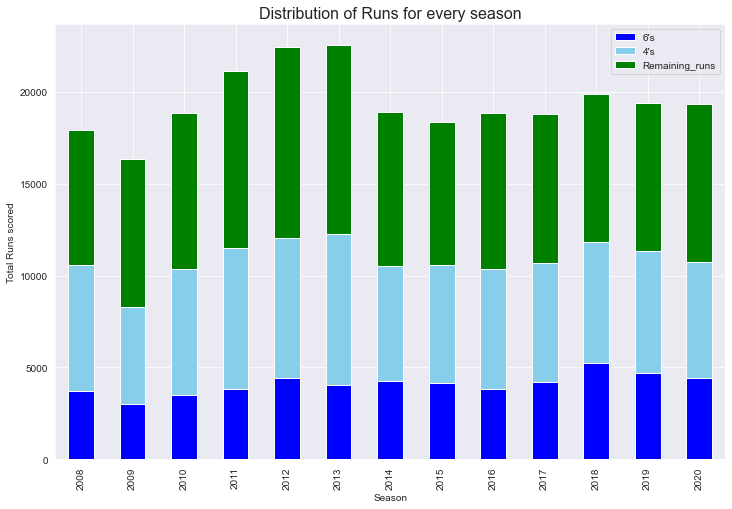

In [45]:
c1 = runs_dist.set_index('date').plot(kind='bar', stacked=True, color=['blue', 'skyblue', 'green'],figsize=(12,8))
plt.title('Distribution of Runs for every season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Total Runs scored')
plt.show()

### <b>Top 10 High scoring matches:</b>

In [46]:
runs_high=ball_data.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
runs_high=runs_high[runs_high['total_runs']>=200]
runs_high

,id,inning,batting_team,bowling_team,total_runs
0,335982,1,KKR,RCB,222
2,335983,1,CSK,KXIP,240
3,335983,2,KXIP,CSK,207
14,335989,1,CSK,MI,208
15,335989,2,MI,CSK,202
...,...,...,...,...,...
1600,1216538,1,MI,SRH,208
1608,1216542,1,SRH,KXIP,201
1618,1216547,1,RCB,MI,201
1619,1216547,2,MI,RCB,201


- A total of **105 matches** in which teams have scored more than 200.

In [47]:
df= runs_high.nlargest(10,'total_runs')
df

,id,inning,batting_team,bowling_team,total_runs
700,598027,1,RCB,PW,263
1116,980987,1,RCB,GL,248
292,419137,1,CSK,RR,246
1354,1136604,1,KKR,KXIP,245
2,335983,1,CSK,KXIP,240
1000,829795,1,RCB,MI,235
472,501260,1,KXIP,RCB,232
1480,1178422,1,KKR,MI,232
398,501223,1,DC,KXIP,231
850,733987,1,KXIP,CSK,231


- **The highest ever runs scored by a team in a match belongs to Royal Challengers Bangalore against Pune Warriors.**

### <b>Successfull chase of 200+ targets:</b>

In [48]:
runs_high=ball_data.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
runs_high1=runs_high[runs_high['inning']==1]
runs_high2=runs_high[runs_high['inning']==2]
runs_high1=runs_high1.merge(runs_high2[['id','inning', 'total_runs']], on='id')
runs_high1.rename(columns={'inning_x':'inning_1','inning_y':'inning_2','total_runs_x':'inning1_runs','total_runs_y':'inning2_runs'},inplace=True)
runs_high1=runs_high1[runs_high1['inning1_runs']>=200]
runs_high1['is_score_chased']=1
runs_high1['is_score_chased'] = np.where(runs_high1['inning1_runs']<=runs_high1['inning2_runs'], 'yes', 'no')
runs_high1['is_score_chased'].value_counts()

no     65
yes    12
Name: is_score_chased, dtype: int64

- **Only 12 matches have had teams succesfully chased down 200 plus targets!**

### <b>Runs scored per over:</b>

In [49]:
runs_per_over = ball_data.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
runs_per_over.reset_index(inplace=True)
runs_per_over.drop(['KTK','PW','RPS','GL'],axis=1,inplace=True)
runs_per_over.rename(columns={'batting_team':'over'})
runs_per_over

batting_team,over,CSK,DC,KKR,KXIP,MI,RCB,RR,SRH
0,0,902,1183,1273,1153,1169,1172,991,1228
1,1,1190,1489,1419,1336,1351,1362,1072,1600
2,2,1382,1550,1526,1538,1582,1544,1269,1598
3,3,1476,1561,1578,1629,1679,1562,1341,1552
4,4,1530,1634,1561,1618,1690,1556,1206,1668
5,5,1568,1492,1514,1633,1733,1503,1272,1688
6,6,1218,1371,1301,1341,1272,1210,1080,1255
7,7,1258,1355,1305,1453,1401,1414,1146,1363
8,8,1340,1429,1320,1460,1516,1436,1221,1448
9,9,1262,1453,1391,1426,1449,1421,1273,1379


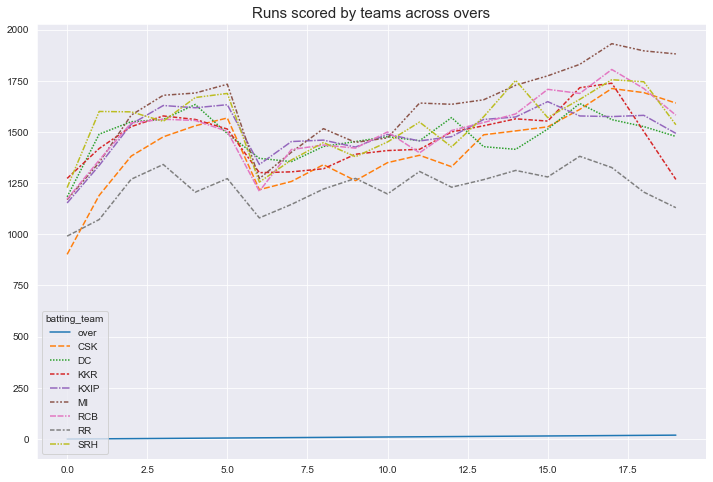

In [50]:
plt.figure(figsize=(12,8))
plt.title("Runs scored by teams across overs",fontsize=15)
sns.lineplot(data=runs_per_over,markers=False)
plt.show()

- **Mumbai Indians seems to have the best performance among teams in both the powerplay as well as death overs ,indicating that they have very strong batting line up**
- All teams undergo a dip during the 7th over , as the powerplay ends.
- **Rajasthan Royals certainly need to improve their middle order as they seem to have the lowest runs scored during the deathovers.**

### <b>Average Runs scored during powerplay:</b>

In [51]:
season=match_data[['id','date','winner']]
complete_data=ball_data.merge(season,how='inner',left_on='id',right_on='id')
powerplay_data=complete_data[complete_data['over']<=6]

p1_avg=powerplay_data[powerplay_data['inning']==1].groupby(['date','id'])['total_runs'].agg(['sum'])
p1_avg=p1_avg.reset_index().groupby('date')['sum'].mean()

p2_avg=powerplay_data[powerplay_data['inning']==2].groupby(['date','id'])['total_runs'].agg(['sum'])
p2_avg=p2_avg.reset_index().groupby('date')['sum'].mean()

df2 = pd.concat([p1_avg,p2_avg],axis=1)
df2.rename(columns={'sum':'Inn1','sum':'Inn2'})
df2

,sum,sum
date,,
2008,51.982759,54.672414
2009,49.912281,47.859649
2010,54.100000,55.150000
2011,47.698630,50.791667
2012,48.500000,51.094595
2013,47.789474,48.276316
2014,50.683333,53.600000
2015,53.338983,53.000000
2016,50.500000,55.466667


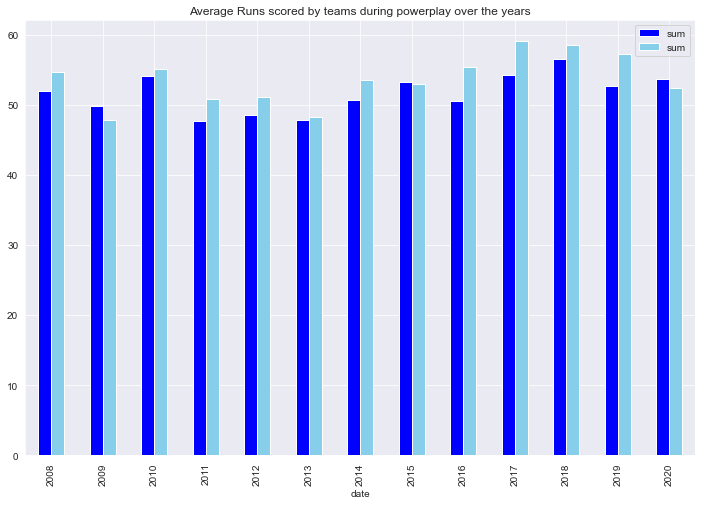

In [52]:
df2.plot(kind='bar',figsize=(12,8),title="Average Runs scored by teams during powerplay over the years",color=('blue','skyblue'))
plt.show()

- From the above plot we are able to understand that the **average runs scored in Innings 2 during powerplay is quite higher compared to Innings1**.
- Runs scored during powerplay across both innings has also increased over the last few years.

### <b>Analysis on Batsman:</b>

In [53]:
df_strikerate = ball_data.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strikerate.rename(columns ={'batsman_runs' : 'strike_rate'}, inplace=True)

df_runs_per_match = ball_data.groupby(['batsman','id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman_run','count' : 'match_count','mean' :'average_score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

df_sixes = ball_data[['batsman','batsman_runs']][ball_data.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four = ball_data[['batsman','batsman_runs']][ball_data.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})
df_batsman_stats = pd.merge(pd.merge(pd.merge(df_strikerate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)

df_batsman_stats.rename(columns={'batsman_runs_x' :'six','batsman_runs_y':'four'},inplace=True)

In [54]:
df_batsman_stats.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stats['strike_rate'] = df_batsman_stats['strike_rate']*100
df_batsman_stats.sort_values(by='batsman_run',ascending=False,inplace=True)
df_batsman_stats.reset_index(inplace=True)
df_batsman_stats

,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
0,V Kohli,4609,127.533087,5878,31.945652,184,202,504
1,SK Raina,4041,132.838406,5368,28.402116,189,194,493
2,DA Warner,3819,137.575281,5254,37.000000,142,195,510
3,RG Sharma,4088,127.935421,5230,26.958763,194,214,458
4,S Dhawan,4208,123.502852,5197,29.697143,175,109,591
...,...,...,...,...,...,...,...,...
331,BJ Haddin,11,163.636364,18,18.000000,1,1,2
332,T Banton,22,81.818182,18,9.000000,2,1,1
333,SA Abbott,13,115.384615,15,7.500000,2,1,1
334,SD Lad,13,115.384615,15,15.000000,1,1,1


### <b>Orange cap Cap Holders for each year:</b>

In [55]:
orange_cap=match_data[['id','date']]
orange_cap=orange_cap.merge(ball_data,left_on='id',right_on='id',how='left')
orange_cap=orange_cap.groupby(['date','batsman'])['batsman_runs'].sum().reset_index()
orange_cap=orange_cap.sort_values('batsman_runs',ascending=0)
orange_cap=orange_cap.drop_duplicates(subset=["date"],keep="first")
orange_cap=orange_cap.sort_values('date',ascending=True)
orange_cap

,date,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


- **David Warner has the highest number of orange_cap caps(3).**
- **Virat Kohli has the highest runs ever scored by a orange_cap cap holder(973)!**

### <b>Highest average runs scored by batsman who have played more than 50 matches:</b>

In [56]:
average_score=df_batsman_stats.sort_values(by='average_score',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)
average_score

,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
2,DA Warner,3819,137.575281,5254,37.000000,142,195,510
21,KL Rahul,1990,133.015075,2647,36.763889,72,104,234
6,CH Gayle,3342,142.788749,4772,36.427481,131,349,384
24,SE Marsh,1908,129.821803,2477,35.898551,69,78,266
39,MEK Hussey,1648,119.963592,1977,34.086207,58,52,198
0,V Kohli,4609,127.533087,5878,31.945652,184,202,504
48,KS Williamson,1222,132.487725,1619,31.134615,52,54,137
5,AB de Villiers,3264,148.560049,4849,31.083333,156,235,390
33,RR Pant,1416,146.822034,2079,30.573529,68,103,184
43,JC Buttler,1184,144.763514,1714,30.070175,57,77,167


- **Highest average belongs to David Warner closely followed by KL Rahul and Chris Gayle**
- Kane williamson is the only player in the list to have played just above 50 games and have better average score compared to veteran Ab de villiers.

### <b>Highest Strike rate of batsman who have played more than 50 matches:</b>

In [57]:
average_score=df_batsman_stats.sort_values(by='strike_rate',ascending=False)
average_score=average_score[average_score['match_count']>50].head(10)
average_score

,batsman,ball,strike_rate,batsman_run,average_score,match_count,six,four
50,AD Russell,882,171.995465,1517,24.868852,61,129,105
82,SP Narine,573,155.671902,892,14.158730,63,52,103
58,HH Pandya,897,150.390190,1349,18.229730,74,93,86
20,V Sehwag,1833,148.827059,2728,26.230769,104,106,334
51,GJ Maxwell,1013,148.568608,1505,19.294872,78,91,119
5,AB de Villiers,3264,148.560049,4849,31.083333,156,235,390
33,RR Pant,1416,146.822034,2079,30.573529,68,103,184
43,JC Buttler,1184,144.763514,1714,30.070175,57,77,167
16,KA Pollard,2107,143.474134,3023,20.993056,144,198,196
6,CH Gayle,3342,142.788749,4772,36.427481,131,349,384


- **Andre Russel** has the highest strike rate(nearly 172!) among the batsman.
- Ironically neither David warner nor KL rahul who had the highest averages have high strike rates.

### <b>Top 10 Batsman who has scored the highest sixes and fours:</b>

In [58]:
best_players = ball_data.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
best_players=best_players.pivot('batsman','batsman_runs','total_runs')
best_players.reset_index(inplace=True)

top_6 = best_players.sort_values(6,ascending=False).head(10)
top_4 = best_players.sort_values(4,ascending=False).head(10)

In [59]:
top_6[['batsman',6]]

batsman_runs,batsman,6
96,CH Gayle,349.0
24,AB de Villiers,235.0
301,MS Dhoni,216.0
379,RG Sharma,214.0
505,V Kohli,202.0
220,KA Pollard,198.0
116,DA Warner,195.0
438,SK Raina,194.0
456,SR Watson,190.0
398,RV Uthappa,163.0


- Chris Gayle has scored the highest number of sixes across all the season of IPL.
- AB de Villiers trails behind Gayle by a whopping 114 sixes.

In [60]:
top_4[['batsman',4]]

batsman_runs,batsman,4
407,S Dhawan,591.0
116,DA Warner,510.0
505,V Kohli,504.0
438,SK Raina,493.0
154,G Gambhir,492.0
379,RG Sharma,458.0
398,RV Uthappa,454.0
42,AM Rahane,416.0
24,AB de Villiers,390.0
96,CH Gayle,384.0


- Shikar Dhawan has scored the highest number of fours followed by David Warner.

### <b>Analysis on Bowlers:</b>

In [61]:
bowlers=ball_data.groupby('bowler').sum().reset_index()
bowl_name=ball_data['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl_name,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)

In [62]:
bowlers

,bowler,runs_given,balls,overs
0,A Ashish Reddy,400,270,45
1,A Chandila,245,234,39
2,A Choudhary,144,108,18
3,A Dananjaya,47,25,4
4,A Flintoff,106,66,11
...,...,...,...,...
415,YA Abdulla,311,222,37
416,YK Pathan,1443,1184,197
417,YS Chahal,2782,2188,364
418,Yuvraj Singh,1091,882,147


In [63]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=ball_data[ball_data["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['avg_economy']=(bowlers['runs_given']/bowlers['overs'])
bowlers

,bowler,runs_given,overs,wickets,avg_economy
0,A Ashish Reddy,400,45,18.0,8.888889
1,A Chandila,245,39,11.0,6.282051
2,A Choudhary,144,18,5.0,8.000000
4,A Flintoff,106,11,2.0,9.636364
5,A Kumble,1089,163,45.0,6.680982
...,...,...,...,...,...
415,YA Abdulla,311,37,15.0,8.405405
416,YK Pathan,1443,197,42.0,7.324873
417,YS Chahal,2782,364,121.0,7.642857
418,Yuvraj Singh,1091,147,36.0,7.421769


### <b>Purple Cap Holders:</b>

In [64]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"] 
purple_cap=ball_data[ball_data["dismissal_kind"].isin(dismissal_kinds)]
purple_cap=purple_cap.merge(match_data,left_on='id',right_on='id',how='outer')
purple_cap=purple_cap.groupby(['date','bowler'])['dismissal_kind'].count().reset_index()
purple_cap=purple_cap.sort_values('dismissal_kind',ascending=False)
purple_cap=purple_cap.drop_duplicates('date',keep='first').sort_values(by='date')
purple_cap.rename({'dismissal_kind':'wickets'},axis=1,inplace=True)
purple_cap

,date,bowler,wickets
75,2008,Sohail Tanvir,22
152,2009,RP Singh,23
241,2010,PP Ojha,21
367,2011,SL Malinga,28
437,2012,M Morkel,25
509,2013,DJ Bravo,32
639,2014,MM Sharma,23
695,2015,DJ Bravo,26
774,2016,B Kumar,23
861,2017,B Kumar,26


### <b>Highest Wicket Takers:</b>

In [65]:
bowlers_top=bowlers.sort_values(by='runs_given',ascending=False)
bowlers_top=bowlers_top.head(20)
bowlers_top=bowlers_top.sort_values(['wickets'],ascending=False)

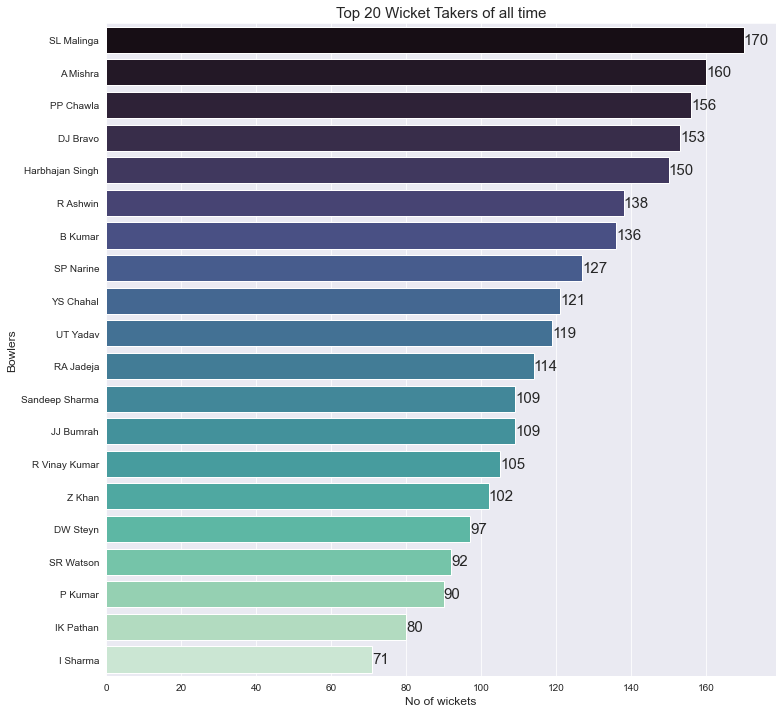

In [66]:
plt.figure(figsize=(12,12))
c1 = sns.barplot(data = bowlers_top,y="bowler", x="wickets",palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Bowlers',fontsize=12)
plt.xlabel('No of wickets',fontsize=12)
plt.title('Top 20 Wicket Takers of all time',fontsize=15)
plt.show()

- **Lasith Malinga is the highest wicket taker with 170 wickets over his entire IPL career.**


### <b>Highest number of dot balls bowled ever:</b>

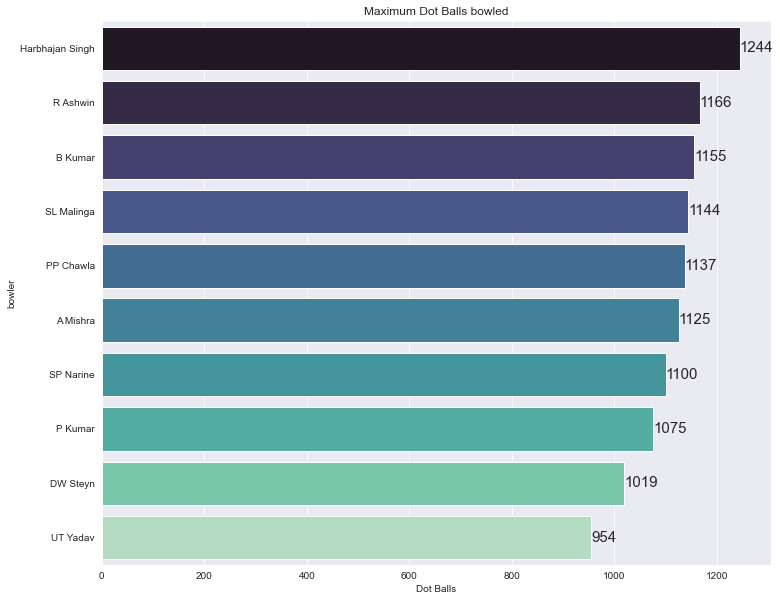

In [67]:
plt.figure(figsize=(12,10))
plt.title("Maximum Dot Balls bowled")
data = ball_data[ball_data['total_runs'] == 0].groupby('bowler').count()['id'].sort_values(ascending=False)[:10]
c1=sns.barplot(y=data.index,x=data,palette="mako")
c1.bar_label(c1.containers[0],size = 15)
plt.xlabel('Dot Balls')
plt.ylabel('bowler')
plt.show()

- **Harbhajan Singh** has bowled the highest number of dot balls ever(1244 balls) i.e hasnt conceded a run.
- Followed by Ashwin and Bhuvaneshwar Kumar respectively

### <b>Teams which have highest number of runs conceded as extras:</b>

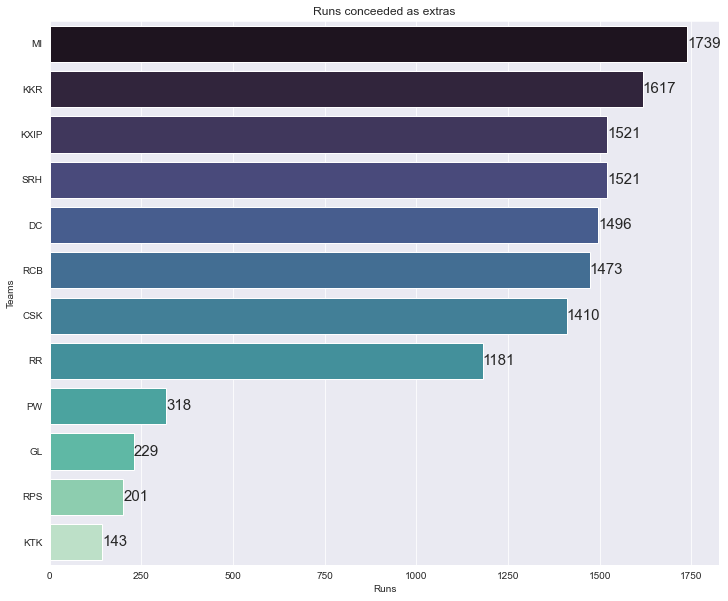

In [68]:
plt.figure(figsize=(12,10))
plt.title("Runs conceeded as extras")
data = ball_data.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False)
c1=sns.barplot(y=data.index,x=data,palette="mako")
c1.bar_label(c1.containers[0],size = 15)
plt.xlabel('Runs')
plt.ylabel('Teams')
plt.show()

### <b>Winners Analysis:</b>

### <b>Teams been to finals multiple times:</b>

In [69]:
finals=match_data.drop_duplicates(subset=['date'],keep='last')
finals=finals[['date','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
most_finals

,team,count
0,CSK,8
1,MI,6
2,RCB,3
3,SRH,3
4,KKR,2
5,DC,1
6,RR,1
7,KXIP,1
8,RPS,1


- **CSK has been to the finals 8 times followed by MI (6 times).**

In [70]:
ipl_winners=match_data.drop_duplicates(subset=['date'], keep='last')[['date','winner']].reset_index(drop=True)
ipl_winners = ipl_winners['winner'].value_counts()

ipl_winners = ipl_winners.to_frame()
ipl_winners.reset_index(inplace=True)
ipl_winners.rename(columns={'index':'team'},inplace=True)
ipl_winners

,team,winner
0,MI,5
1,CSK,3
2,SRH,2
3,KKR,2
4,RR,1


- **MI has been the most successful team by winning around 5 out of the 6 finals they have been too.**

### <b>Team's decision after they win the toss during finals?</b>

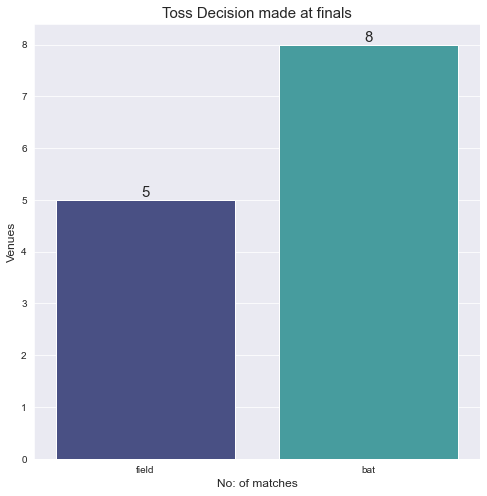

In [71]:
winners_ipl=match_data.drop_duplicates(subset=['date'], keep='last')[['date','winner','toss_decision','result','result_margin']]
final_toss_decision = match_data['toss_decision'].value_counts().head(10)
plt.figure(figsize=(8,8))
c1 = sns.countplot(x='toss_decision',order=final_toss_decision.index,data = winners_ipl,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Toss Decision made at finals',fontsize=15)
plt.show()

- **Predominantly most of the teams which win the toss at finals elect to bat first !**

### <b>Win Rate of the Toss Decision taken during Finals:</b>

In [72]:
finals

,date,city,team1,team2,toss_winner,toss_decision,winner
57,2008,Mumbai,CSK,RR,RR,field,RR
114,2009,Johannesburg,RCB,SRH,RCB,field,SRH
174,2010,Mumbai,CSK,MI,CSK,bat,CSK
247,2011,Chennai,CSK,RCB,CSK,bat,CSK
321,2012,Chennai,KKR,CSK,CSK,bat,KKR
397,2013,Kolkata,CSK,MI,MI,bat,MI
457,2014,Bangalore,KKR,KXIP,KKR,field,KKR
516,2015,Kolkata,MI,CSK,CSK,field,MI
576,2016,Bangalore,RCB,SRH,SRH,bat,SRH
635,2017,Hyderabad,MI,RPS,MI,bat,MI


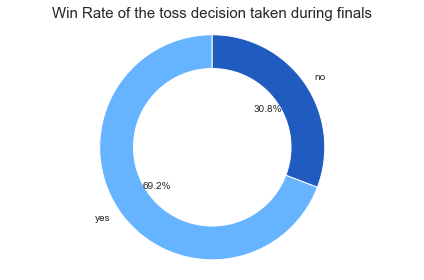

In [73]:
df=finals[finals['toss_winner']==finals['winner']]
slices=[len(df),(len(finals)-len(df))]
labels=['yes','no']
colors = ['#66b3ff','#205bc0','#94b5ef']
 
fig1, ax1 = plt.subplots()
ax1.pie(slices, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Win Rate of the toss decision taken during finals",fontsize=15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

- **Around 69 percent of the toss decision's taken during finals has been succesfull.**